# Trabalho de Álgebra Linear - Compressão usando SVD e Reconhecimento de Imagens

In [2]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Acessando Conjunto Treino:

### Acessando os Labels do Conjunto Treino:

In [3]:
file_train_labels = gzip.open('train-labels-idx1-ubyte.gz','r')

file_train_labels.read(8)

buf_train_labels = file_train_labels.read(12000)

data_train_labels = np.frombuffer(buf_train_labels, dtype=np.uint8).astype(np.int32)

train_labels = data_train_labels

# Print dos labels do Conjunto Treino
print(train_labels[:10])

[5 0 4 1 9 2 1 3 1 4]


### Acessando as Imagens do Conjunto Treino:

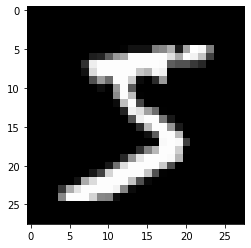

Foto 1



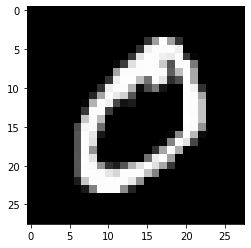

Foto 2



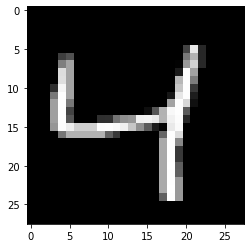

Foto 3



In [4]:
file_train_images = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images_train = 12000

file_train_images.read(16)

buf_train_images = file_train_images.read(image_size * image_size * num_images_train)

data_train_images = np.frombuffer(buf_train_images, dtype=np.uint8).astype(np.float32)
data_train_images = data_train_images.reshape(num_images_train, image_size, image_size, 1)

train_images = data_train_images

# Plot das Imagens do Conjunto Treino
for i in range(0, 3):
    plt.imshow(np.asarray(data_train_images[i]).squeeze(), cmap='gray')
    plt.show()
    print("Foto {}".format(i+1))
    print()

# Acessando Conjunto Teste:

### Acessando os Labels do Conjunto Teste:

In [5]:
file_test_labels = gzip.open('t10k-labels-idx1-ubyte.gz','r')

file_test_labels.read(8)

buf_test_labels = file_test_labels.read(2000)

data_test_labels = np.frombuffer(buf_test_labels, dtype=np.uint8).astype(np.int32)

test_labels = data_test_labels

# Pritando os labels do Conjunto Teste
print(test_labels[:10])

[7 2 1 0 4 1 4 9 5 9]


### Acessando as Imagens do Conjunto Teste:

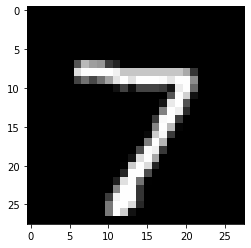

Foto 1



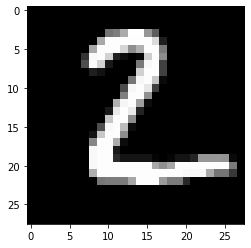

Foto 2



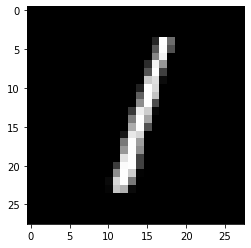

Foto 3



In [6]:
file_test_images = gzip.open('t10k-images-idx3-ubyte.gz','r')

image_size = 28
num_images_test = 2000

file_test_images.read(16)

buf_test_images = file_test_images.read(image_size * image_size * num_images_test)

data_test_images = np.frombuffer(buf_test_images, dtype=np.uint8).astype(np.float32)
data_test_images = data_test_images.reshape(num_images_test, image_size, image_size, 1)

test_images = data_test_images

for i in range(0, 3):
    plt.imshow(np.asarray(data_test_images[i]).squeeze(), cmap='gray')
    plt.show()
    print("Foto {}".format(i+1))
    print()

# Tratamento das Imagens:

### Tratando as imagens do Conjunto Treino:

  Criando matriz de dados **Não-Centralizada** (**Matriz de imagens**):

In [7]:
X_train = np.asarray(train_images).squeeze().reshape(num_images_train, 784)
print(X_train.shape)

(12000, 784)


Calculando media e centralizando dados:

In [8]:
train_mean = np.mean(X_train, axis = 0)

X_train = (X_train - train_mean)
print(X_train.shape)

(12000, 784)


Calculando Decomposição de Valor Singular - SVD:

In [9]:
start_time = timeit.default_timer()

U_train, S_train, Vt_train = np.linalg.svd(X_train, full_matrices=False)
V_train = Vt_train.T

elapsed = timeit.default_timer() - start_time

print('U shape =', np.shape(U_train), 'S length =', np.shape(S_train), 'Vt shape =', np.shape(Vt_train))
print('Tempo de processamento: {:6.2f} s'.format(elapsed))

U shape = (12000, 784) S length = (784,) Vt shape = (784, 784)
Tempo de processamento:   1.48 s


Estabelecendo o número de autovalores a ser utilizado para remodelar a imagem:

In [10]:
autovalor_num = 50  # 50 é a quantidade de autovalores com maior acuracia

Redimensionalizando as Imagens e Projetando no Plano dos Autovetores:

In [11]:
Y_train = np.dot(U_train[:,:autovalor_num], np.diag(S_train)[:autovalor_num, :autovalor_num])
X_train = np.dot(Y_train, Vt_train[:autovalor_num, :])
print(X_train.shape)

(12000, 784)


Retornando a media:

In [12]:
X_train = (X_train + train_mean)
print(X_train.shape)

(12000, 784)


Voltando ao formato imagem:

In [13]:
train_image_plot = X_train[0] # Foi escolhido como exemplo a image[0], ou seja primeira imagem do Conjunto Treino
print(train_image_plot.shape)

(784,)


In [14]:
train_image_plot = train_image_plot.reshape((28, 28))
print(train_image_plot.shape)

(28, 28)


Plot da imagem final (Exemplo):

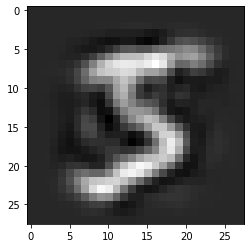

In [15]:
train_image_plot = np.asarray(train_image_plot)
plt.imshow(train_image_plot, cmap='gray')
plt.show()

### Tratando as imagens do Conjunto Teste:

Criando matriz de dados **Não-Centralizada**:

In [16]:
X_test = np.asarray(test_images).squeeze().reshape(num_images_test, 784)
print(X_test.shape)

(2000, 784)


# Resultados:

### Reconhecimento (Usando Distância Euclidiana):

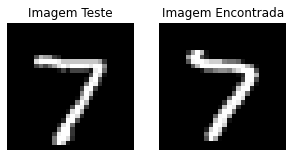

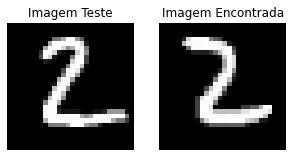

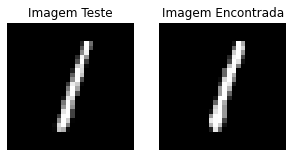

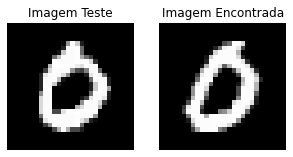

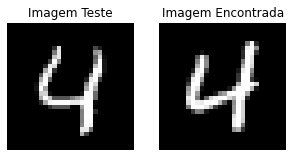

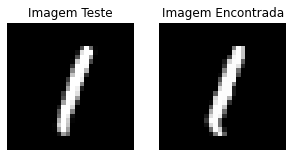

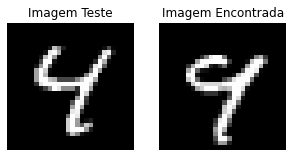

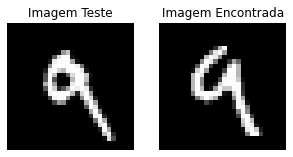

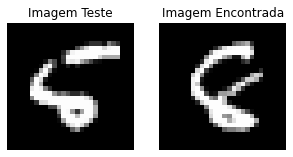

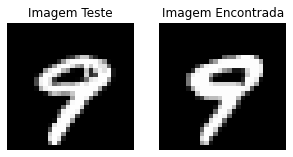

Accuracy = 94.25% | 1885 successes | 50 autovalores
Tempo de processamento: 211.26 s


In [17]:
start_time = timeit.default_timer()

successes = 0

for i in range(0, num_images_test):
    
    image_test_recognition = X_test[i].reshape((784, 1))
    image_train_recognition = X_train[0].reshape((784, 1))
    
    aux_image = image_test_recognition - image_train_recognition
    min_distance = np.linalg.norm(aux_image)
    
    index = 0
    
    for j in range(0, num_images_train):
        
        image_train_recognition = X_train[j].reshape((784, 1))
        
        aux_image = image_test_recognition - image_train_recognition
        
        if np.linalg.norm(aux_image) < min_distance:
            min_distance = np.linalg.norm(aux_image)
            index = j
            
    if(i < 10):
        plt.figure(figsize=(5,5))
        plt.subplot(1, 2, 1)
        plt.imshow(X_test[i].reshape((28, 28)), cmap="gray")
        plt.title("Imagem Teste")
        plt.axis("off")
        plt.subplot(1, 2, 2)
        plt.imshow(np.asarray(train_images).squeeze()[index], cmap="gray")
        plt.title("Imagem Encontrada")
        plt.axis("off")
        plt.show()
                
    if test_labels[i] == train_labels[index]:
        successes += 1

    min_distance = 0

print("Accuracy = {:.2f}% | {} successes | {} autovalores".format((successes/num_images_test)*100, successes, autovalor_num))

elapsed = timeit.default_timer() - start_time
print('Tempo de processamento: {:6.2f} s'.format(elapsed))

# Gráficos:

### Gráfico da Acurácia X Número de Valores Singulares:

In [17]:
start_time = timeit.default_timer()

list_accuracy = []

for num_autovalor in range(10, 784, 10):
    
    # Criando a Matriz Final
    Y_train = np.dot(U_train[:,:num_autovalor], np.diag(S_train)[:num_autovalor, :num_autovalor])
    X_train = np.dot(Y_train, Vt_train[:num_autovalor, :])
    
    # Retonando a media
    X_train = (X_train + train_mean)
    
    successes = 0

    for i in range(0, num_images_test):

        image_test_recognition = X_test[i].reshape((784, 1))
        image_train_recognition = X_train[0].reshape((784, 1))

        aux_image = image_test_recognition - image_train_recognition
        min_distance = np.linalg.norm(aux_image)

        index = 0

        for j in range(0, num_images_train):

            image_train_recognition = X_train[j].reshape((784, 1))

            aux_image = image_test_recognition - image_train_recognition

            if np.linalg.norm(aux_image) < min_distance:
                min_distance = np.linalg.norm(aux_image)
                index = j

        if test_labels[i] == train_labels[index]:
            successes += 1

        min_distance = 0
    
    accuracy = (successes/num_images_test)*100
    list_accuracy.append(accuracy)
    
    print("Accuracy = {:.2f}% | {} successes | {} autovalores".format(accuracy, successes, num_autovalor))

elapsed = timeit.default_timer() - start_time
print('\nTempo de processamento: {:6.2f} s'.format(elapsed))

Accuracy = 86.45% | 1729 successes | 10 autovalores
Accuracy = 93.15% | 1863 successes | 20 autovalores
Accuracy = 94.15% | 1883 successes | 30 autovalores
Accuracy = 94.15% | 1883 successes | 40 autovalores
Accuracy = 94.25% | 1885 successes | 50 autovalores
Accuracy = 94.20% | 1884 successes | 60 autovalores
Accuracy = 93.95% | 1879 successes | 70 autovalores
Accuracy = 93.90% | 1878 successes | 80 autovalores
Accuracy = 94.00% | 1880 successes | 90 autovalores
Accuracy = 93.75% | 1875 successes | 100 autovalores
Accuracy = 93.75% | 1875 successes | 110 autovalores
Accuracy = 93.70% | 1874 successes | 120 autovalores
Accuracy = 93.55% | 1871 successes | 130 autovalores
Accuracy = 93.70% | 1874 successes | 140 autovalores
Accuracy = 93.65% | 1873 successes | 150 autovalores
Accuracy = 93.30% | 1866 successes | 160 autovalores
Accuracy = 93.35% | 1867 successes | 170 autovalores
Accuracy = 93.35% | 1867 successes | 180 autovalores
Accuracy = 93.10% | 1862 successes | 190 autovalores
Ac

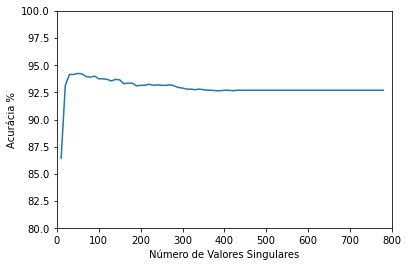

In [18]:
plt.plot(np.arange(10, 784, 10), list_accuracy)
plt.xlabel('Número de Valores Singulares')
plt.ylabel('Acurácia %')
plt.axis([0, 800, 80, 100])
plt.show()

Dando um zoom:

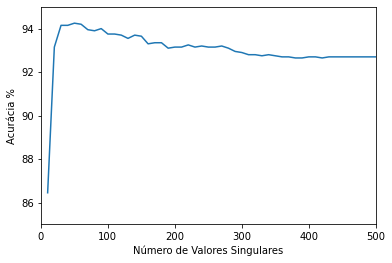

In [19]:
plt.plot(np.arange(10, 784, 10), list_accuracy)
plt.xlabel('Número de Valores Singulares')
plt.ylabel('Acurácia %')
plt.axis([0, 500, 85, 95])
plt.show()

### Gráfico da Variabilidade Acumulada X Número de Valores Singulares:

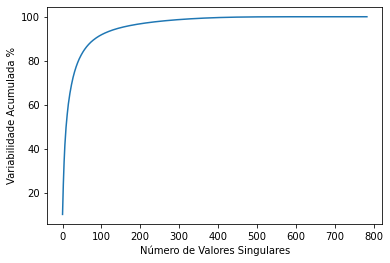

In [21]:
total_var_train = np.sum(S_train**2)
y_plot = np.cumsum(S_train**2) / total_var_train
x_plot = np.array(range(len(S_train)))

plt.plot(x_plot, y_plot*100)
plt.xlabel('Acurácia %')
plt.ylabel('Variabilidade Acumulada %')
plt.show()